In [1]:
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
games=pd.read_csv('games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

In [3]:
games.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'AvgRating', 'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers',
       'ComAgeRec', 'LanguageEase', 'BestPlayers', 'GoodPlayers', 'NumOwned',
       'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Family', 'Kickstarted', 'ImagePath',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens'],
      dtype='object')

In [4]:
game_cols=['BGGId','Name','YearPublished','MfgPlaytime',
           'MinPlayers','MaxPlayers','MfgAgeRec',
           'NumUserRatings','NumOwned','NumWant','NumWish']
games=games[game_cols]
games.to_csv('games_reduced.csv')

In [5]:
games.head()

,BGGId,Name,YearPublished,MfgPlaytime,MinPlayers,MaxPlayers,MfgAgeRec,NumUserRatings,NumOwned,NumWant,NumWish
0,1,Die Macher,1986,240,3,5,14,5354,7498,501,2039
1,2,Dragonmaster,1981,30,3,4,12,562,1285,72,191
2,3,Samurai,1998,60,2,4,10,15146,15578,799,3450
3,4,Tal der Könige,1992,60,2,4,12,340,638,54,123
4,5,Acquire,1964,90,2,6,12,18655,23735,548,2671


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BGGId           21925 non-null  int64 
 1   Name            21925 non-null  object
 2   YearPublished   21925 non-null  int64 
 3   MfgPlaytime     21925 non-null  int64 
 4   MinPlayers      21925 non-null  int64 
 5   MaxPlayers      21925 non-null  int64 
 6   MfgAgeRec       21925 non-null  int64 
 7   NumUserRatings  21925 non-null  int64 
 8   NumOwned        21925 non-null  int64 
 9   NumWant         21925 non-null  int64 
 10  NumWish         21925 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ MB


In [7]:
games.describe()

,BGGId,YearPublished,MfgPlaytime,MinPlayers,MaxPlayers,MfgAgeRec,NumUserRatings,NumOwned,NumWant,NumWish
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,1985.494914,90.513523,2.007343,5.707868,9.613409,861.668324,1467.848164,41.690946,228.457013
std,104628.721777,212.486214,529.657389,0.693093,15.014643,3.641560,3638.680857,5294.120574,117.255229,788.477151
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,12346.000000,2001.000000,25.000000,2.000000,4.000000,8.000000,56.000000,150.000000,3.000000,14.000000
50%,105305.000000,2011.000000,45.000000,2.000000,4.000000,10.000000,123.000000,320.000000,9.000000,39.000000
75%,206169.000000,2017.000000,90.000000,2.000000,6.000000,12.000000,395.000000,899.000000,28.000000,127.000000
max,349161.000000,2021.000000,60000.000000,10.000000,999.000000,25.000000,108101.000000,166497.000000,2031.000000,19182.000000


In [8]:
games[games['YearPublished']<0][['Name','YearPublished']]

,Name,YearPublished
164,Go,-2200
1195,The Royal Game of Ur,-2600
1721,Backgammon,-3000
1723,Senet,-3500
2574,Nine Men's Morris,-1400
3304,Chutes and Ladders,-200
3356,Marbles,-3000
5345,Knucklebones,-3000
5378,Tic-Tac-Toe,-1300
6640,Three Men's Morris,-1400


In [9]:
games[games['YearPublished']==0][['Name','YearPublished']].head()

,Name,YearPublished
2052,Lepanto,0
2646,Jungle,0
2745,Mao,0
3009,Sinaí,0
3146,Carrom,0


In [10]:
games[games['YearPublished']==0]['Name'].size

193

In [11]:
for column in games.columns:
    number_zeros=games[games[column]==0]['Name'].size
    if number_zeros>0:
        print(f"{column} has 0 {number_zeros} times")

YearPublished has 0 193 times
MfgPlaytime has 0 780 times
MinPlayers has 0 50 times
MaxPlayers has 0 173 times
MfgAgeRec has 0 1325 times
NumOwned has 0 1 times
NumWant has 0 1938 times
NumWish has 0 106 times


In [12]:
median_year=games['YearPublished'].median()
median_year

2011.0

In [13]:
games[games['MfgAgeRec']==0]['Name'].head()

145          Black Death
248         Rossyïa 1917
323    Wrott & Swindlers
387      Beutelschneider
478    Doolittle & Waite
Name: Name, dtype: object

In [14]:
replaceZeroList=games.columns[2: -4]
for column in replaceZeroList:
    median=games[column].median()
    games[column].replace(0, median,inplace=True)
    print(f"median {column} is {median}")

median YearPublished is 2011.0
median MfgPlaytime is 45.0
median MinPlayers is 2.0
median MaxPlayers is 4.0
median MfgAgeRec is 10.0


C:\Users\op101\AppData\Local\Temp\ipykernel_5980\112971529.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games[column].replace(0, median,inplace=True)
C:\Users\op101\AppData\Local\Temp\ipykernel_5980\112971529.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [15]:
for column in games.columns:
    number_zeros=games[games[column]==0]['Name'].size
    if number_zeros>0:
        print(f"{column} has 0 {number_zeros} times")

NumOwned has 0 1 times
NumWant has 0 1938 times
NumWish has 0 106 times


In [16]:
games

,BGGId,Name,YearPublished,MfgPlaytime,MinPlayers,MaxPlayers,MfgAgeRec,NumUserRatings,NumOwned,NumWant,NumWish
0,1,Die Macher,1986,240,3,5,14,5354,7498,501,2039
1,2,Dragonmaster,1981,30,3,4,12,562,1285,72,191
2,3,Samurai,1998,60,2,4,10,15146,15578,799,3450
3,4,Tal der Könige,1992,60,2,4,12,340,638,54,123
4,5,Acquire,1964,90,2,6,12,18655,23735,548,2671
...,...,...,...,...,...,...,...,...,...,...,...
21920,347146,Salvage,2021,40,3,4,10,34,46,10,34
21921,347521,Blitzkrieg!: World War Two in 20 Minutes,2019,45,1,2,14,45,152,16,52
21922,348955,Rock Paper Scissors: Deluxe Edition,2021,1,1,3,12,66,6,2,13
21923,349131,Splitter,2021,15,1,12,8,51,110,10,49


In [17]:
games.to_csv("games_filled.csv")

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df_mechanics=pd.read_csv('mechanics.csv')
df_mechanics.head()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_mechanics=pd.read_csv('mechanics.csv')
df_mechanics.head()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_mechanics=pd.read_csv('Table_mechanics.csv')
df_mechanics.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
0,0,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
1,1,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
2,2,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
3,3,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
4,4,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical


In [22]:
df_mechanics.iloc[:,1:].value_counts()

1          2                          3                4             5                6                              7             8             9                        10              11              12             13          14      15           16             17                            18         19                20                   21             22                          23                       24                    25           26       27              28      29    30                 31               32                    33                      34            35    36             37           38                   39                                  40      41      42                43                  44            45               46          47                    48             49                     50                51         52                   53           54                      55                    56      57                    58        59            60    

In [23]:
df_mechanics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Columns: 158 entries, Unnamed: 0 to 157
dtypes: int64(1), object(157)
memory usage: 193.9+ KB


In [24]:
games_reduces=pd.read_csv("games_reduced.csv")
games_reduces.head()

,Unnamed: 0,BGGId,Name,YearPublished,MfgPlaytime,MinPlayers,MaxPlayers,MfgAgeRec,NumUserRatings,NumOwned,NumWant,NumWish
0,0,1,Die Macher,1986,240,3,5,14,5354,7498,501,2039
1,1,2,Dragonmaster,1981,30,3,4,12,562,1285,72,191
2,2,3,Samurai,1998,60,2,4,10,15146,15578,799,3450
3,3,4,Tal der Könige,1992,60,2,4,12,340,638,54,123
4,4,5,Acquire,1964,90,2,6,12,18655,23735,548,2671


In [25]:
datasets={
    "artist":pd.read_csv("artists_reduced.csv"),
    "designer":pd.read_csv('designers_reduced.csv'),
    "mechanic":pd.read_csv("mechanics.csv"),
    "publisher":pd.read_csv("publishers_reduced.csv"),
    "subcategory":pd.read_csv("subcategories.csv"),
    "themes":pd.read_csv("themes.csv")
}

In [26]:
datasets["artist"].head()

,Harald Lieske,Franz Vohwinkel,Peter Whitley,Scott Okumura,(Uncredited),Doris Matthäus,Alan R. Moon,Alexander Jung,Andrea Boekhoff,Björn Pertoft,...,Nathan Meunier,Andrey Gordeev,Zbigniew Umgelter,Jeppe Norsker,Daniel Profiri,Aleksander Zawada,Simon Douchy,Felix Wermke,BGGId,Low-Exp Artist
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [27]:
for dataset in datasets.keys():
    df=datasets[dataset]
    if 'BGGId' in df.columns:
        datasets[dataset] = pd.concat([df[['BGGId']], df.drop(columns=['BGGId'])], axis=1)

In [28]:
datasets['artist'].head()

,BGGId,Harald Lieske,Franz Vohwinkel,Peter Whitley,Scott Okumura,(Uncredited),Doris Matthäus,Alan R. Moon,Alexander Jung,Andrea Boekhoff,...,Oliver Barrett,Nathan Meunier,Andrey Gordeev,Zbigniew Umgelter,Jeppe Norsker,Daniel Profiri,Aleksander Zawada,Simon Douchy,Felix Wermke,Low-Exp Artist
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


=== Dataset: artist ===
Кількість стовпців лише з нулями: 0
Кількість рядків лише з нулями: 5997
Середня кількість тегів на гру: 1.19
Середня кількість ігор на тег: 15.58


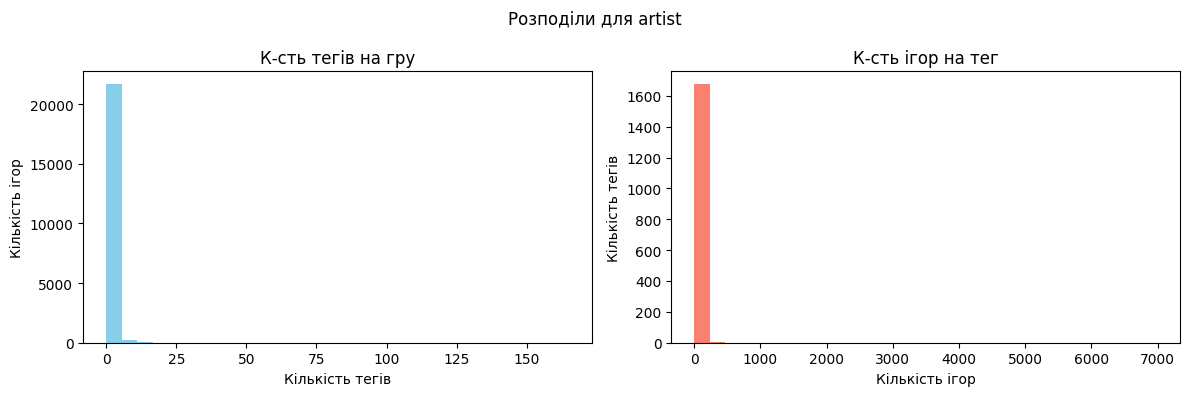


=== Dataset: designer ===
Кількість стовпців лише з нулями: 0
Кількість рядків лише з нулями: 599
Середня кількість тегів на гру: 1.22
Середня кількість ігор на тег: 16.79


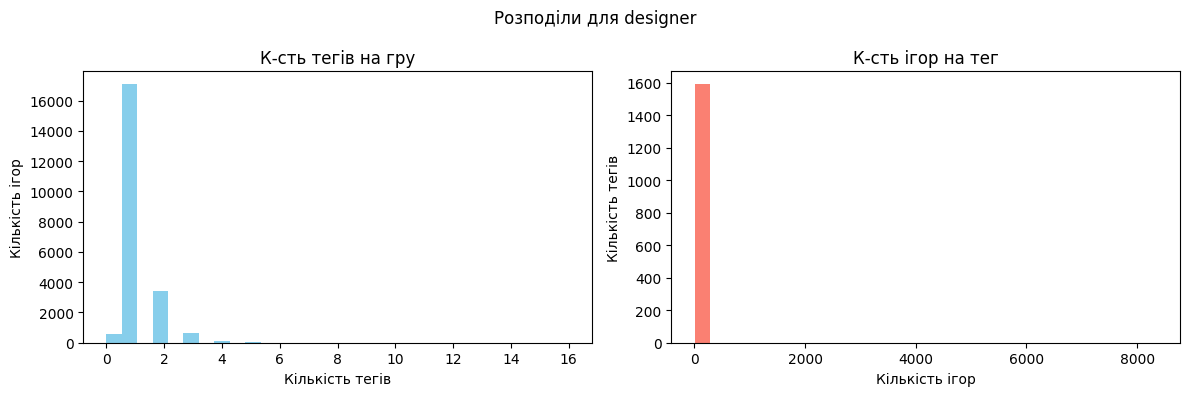


=== Dataset: mechanic ===
Кількість стовпців лише з нулями: 0
Кількість рядків лише з нулями: 1084
Середня кількість тегів на гру: 3.11
Середня кількість ігор на тег: 433.63


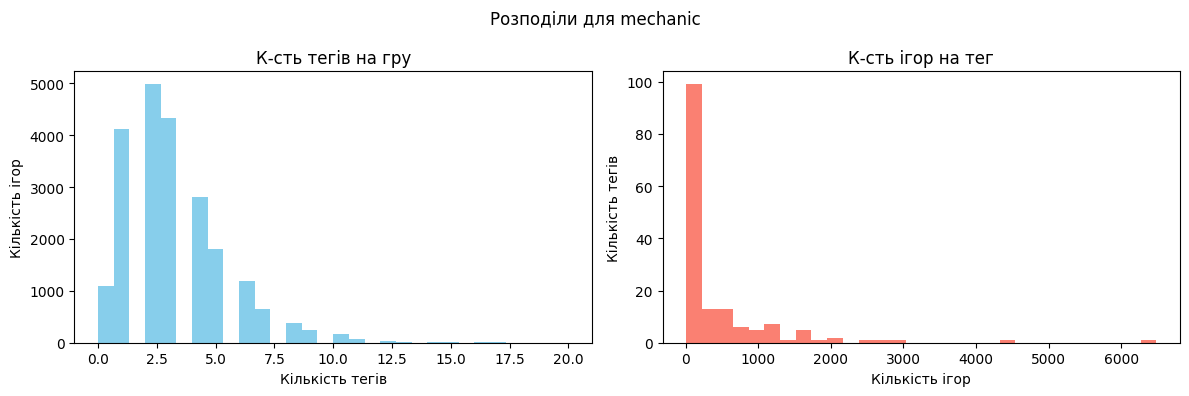


=== Dataset: publisher ===
Кількість стовпців лише з нулями: 0
Кількість рядків лише з нулями: 1
Середня кількість тегів на гру: 2.58
Середня кількість ігор на тег: 30.35


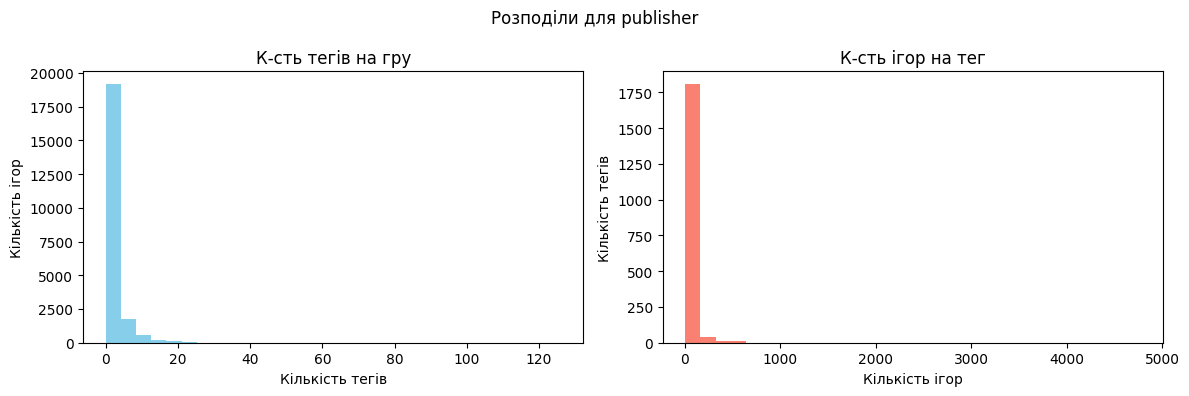


=== Dataset: subcategory ===
Кількість стовпців лише з нулями: 0
Кількість рядків лише з нулями: 11892
Середня кількість тегів на гру: 0.54
Середня кількість ігор на тег: 1181.00


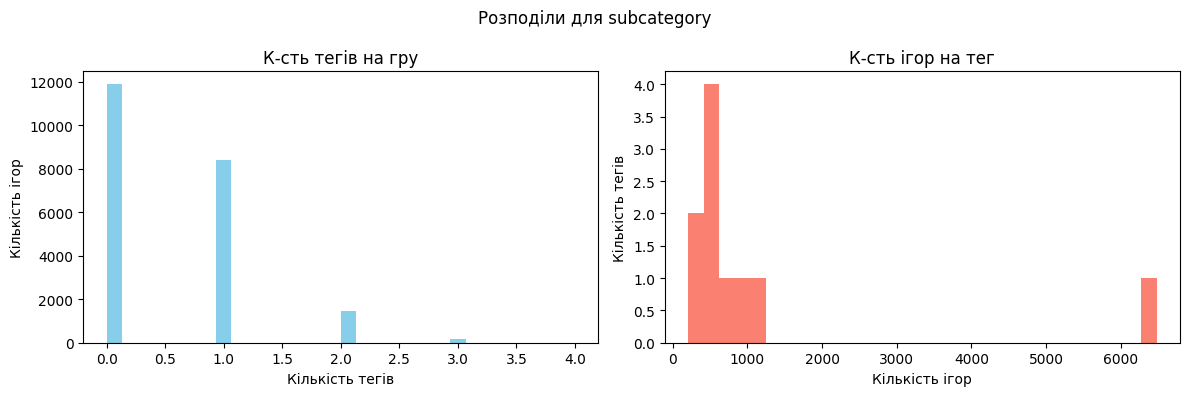


=== Dataset: themes ===
Кількість стовпців лише з нулями: 0
Кількість рядків лише з нулями: 4410
Середня кількість тегів на гру: 1.48
Середня кількість ігор на тег: 149.21


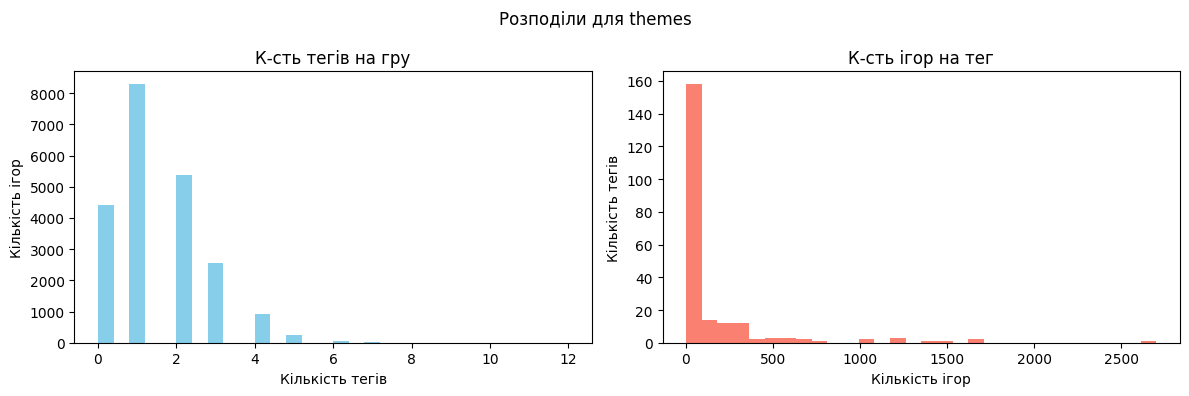

In [29]:
for name, df in datasets.items():
    print(f"=== Dataset: {name} ===")
    
    bin_cols = df.columns[1:]
    data_bin = df[bin_cols]
    
    # к-сть стовпців, де всі значення == 0
    zero_cols = (data_bin.sum(axis=0) == 0).sum()
    print(f"Кількість стовпців лише з нулями: {zero_cols}")
    
    # к-сть рядків, де всі значення == 0
    zero_rows = (data_bin.sum(axis=1) == 0).sum()
    print(f"Кількість рядків лише з нулями: {zero_rows}")

    # середня к-сть тегів на гру
    tags_per_game = data_bin.sum(axis=1)
    mean_tags_per_game = tags_per_game.mean()
    print(f"Середня кількість тегів на гру: {mean_tags_per_game:.2f}")
    
    # середня к-сть ігор на тег
    games_per_tag = data_bin.sum(axis=0)
    mean_games_per_tag = games_per_tag.mean()
    print(f"Середня кількість ігор на тег: {mean_games_per_tag:.2f}")
    
    # --------- Графіки ---------
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle(f"Розподіли для {name}")
    
    # Гістограма: кількість тегів на гру
    axs[0].hist(tags_per_game, bins=30, color='skyblue')
    axs[0].set_title("К-сть тегів на гру")
    axs[0].set_xlabel("Кількість тегів")
    axs[0].set_ylabel("Кількість ігор")
    
    # Гістограма: кількість ігор на тег
    axs[1].hist(games_per_tag, bins=30, color='salmon')
    axs[1].set_title("К-сть ігор на тег")
    axs[1].set_xlabel("Кількість ігор")
    axs[1].set_ylabel("Кількість тегів")
    
    plt.tight_layout()
    plt.show()
    
    print()

In [30]:
ratings=pd.read_csv('ratings_distribution.csv')
ratings.head()

,BGGId,0.0,0.1,0.5,1.0,1.1,1.2,1.3,1.4,1.5,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,total_ratings
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,5.0,11.0,86.0,3.0,4.0,6.0,8.0,426.0,5352.0
1,2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,562.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,7.0,4.0,77.0,3.0,1.0,5.0,3.0,477.0,15148.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,342.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,8.0,4.0,82.0,7.0,9.0,10.0,5.0,905.0,18387.0


In [31]:
ratings.columns

Index(['BGGId', '0.0', '0.1', '0.5', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5',
       '1.6', '1.7', '1.8', '1.9', '2.0', '2.1', '2.2', '2.3', '2.4', '2.5',
       '2.6', '2.7', '2.8', '2.9', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5',
       '3.6', '3.7', '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5',
       '4.6', '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '6.7', '6.8', '6.9', '7.0', '7.1', '7.2', '7.3', '7.4', '7.5',
       '7.6', '7.7', '7.8', '7.9', '8.0', '8.1', '8.2', '8.3', '8.4', '8.5',
       '8.6', '8.7', '8.8', '8.9', '9.0', '9.1', '9.2', '9.3', '9.4', '9.5',
       '9.6', '9.7', '9.8', '9.9', '10.0', 'total_ratings'],
      dtype='object')

In [32]:
# видалення не рейтингових стовпців
rating_cols = [col for col in ratings.columns if col not in ['BGGId', 'total_ratings']]

# створення категорій для згрупування рейтингу
bin_map = {}
for col in rating_cols:
    val = float(col)
    if val < 9.0:
        bin_idx = int(val)
    else:
        bin_idx = 9
    bin_map.setdefault(bin_idx, []).append(col)




rating_values = [float(col) for col in rating_cols]

# розрахунок середнього рейтингу
weighted_sum = (
    ratings[rating_cols] * rating_values
).sum(axis=1)

ratings['average_rating'] = weighted_sum / ratings['total_ratings']



bin_labels = []
for v in rating_values:
    if v >= 9.0:
        bin_labels.append(9)
    else:
        bin_labels.append(int(v))

# Мапа належності колонки до категорії
bin_mapping_df = pd.DataFrame({
    'col': rating_cols,
    'bin': bin_labels
})

# Згрупувати колонки за числом
bins = bin_mapping_df.groupby('bin')['col'].apply(list)

# Кількість рейтингів в округленого значення
ratings_bins = pd.DataFrame()
for bin_num, cols in bins.items():
    ratings_bins[f'{bin_num}'] = ratings[cols].sum(axis=1)

# Додати номер настільної гри
result = pd.concat([ratings['BGGId'], ratings['average_rating'], ratings['total_ratings'], ratings_bins], axis=1)

result.to_csv("ratings_binned.csv")

result.head()

,BGGId,average_rating,total_ratings,0,1,2,3,4,5,6,7,8,9
0,1,7.672104,5352.0,0.0,0.0,24.0,60.0,92.0,231.0,628.0,1312.0,1598.0,1407.0
1,2,6.642883,562.0,0.0,3.0,2.0,9.0,19.0,75.0,162.0,157.0,83.0,52.0
2,3,7.484335,15148.0,0.0,0.0,0.0,16.0,170.0,506.0,2039.0,5505.0,4807.0,2105.0
3,4,6.599415,342.0,0.0,0.0,0.0,5.0,10.0,44.0,109.0,107.0,49.0,18.0
4,5,7.439860,18387.0,0.0,0.0,0.0,0.0,56.0,945.0,2996.0,6587.0,4952.0,2851.0


In [33]:
games_regression=pd.concat([games, ratings['average_rating']],axis=1)
games_classification=pd.concat([games, ratings['average_rating'].apply(lambda x: int(x))],axis=1)

<Axes: xlabel='total_ratings'>

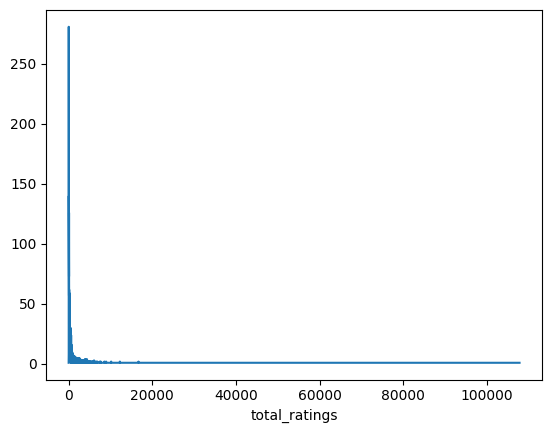

In [34]:
ratings['total_ratings'].value_counts().sort_index().plot()

In [35]:
games_classification.average_rating.value_counts().sort_index()

average_rating
1       8
2      25
3     177
4    1216
5    5276
6    9266
7    5023
8     897
9      37
Name: count, dtype: int64

<Axes: xlabel='average_rating'>

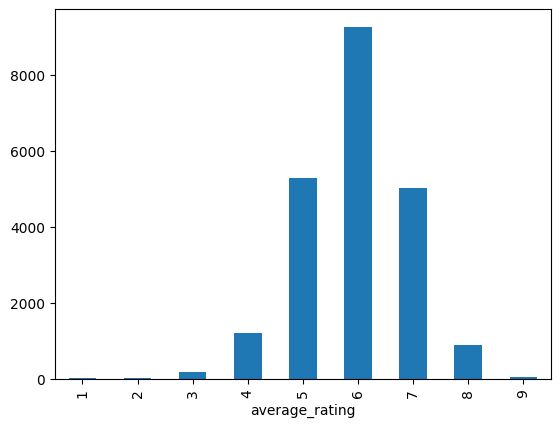

In [36]:
games_classification.average_rating.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='average_rating'>

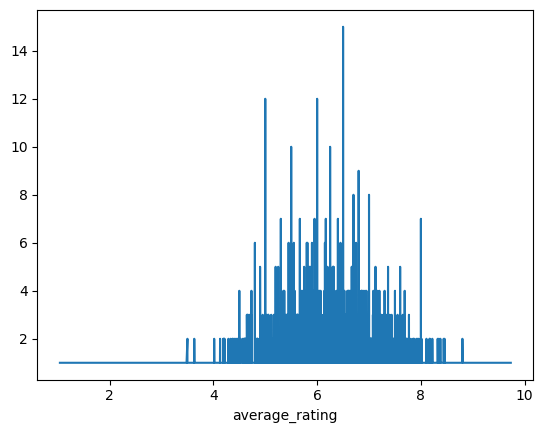

In [37]:
games_regression.average_rating.value_counts().sort_index().plot()

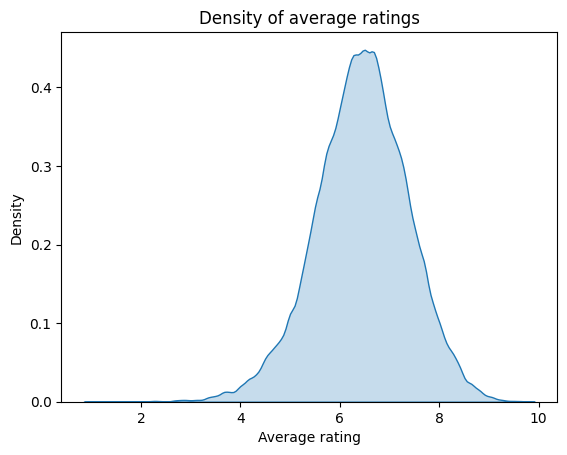

In [38]:
sns.kdeplot(games_regression.average_rating, fill=True, bw_adjust=0.5)
plt.xlabel("Average rating")
plt.title("Density of average ratings")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
class_df_train, class_df_test, class_labels_train, class_labels_test=train_test_split(
    games_classification.drop(["average_rating",'NumOwned','NumWish','NumWant'], axis=1),
    games_classification['average_rating'], 
    train_size=0.8,
    stratify = games_classification["average_rating"],
    random_state = 42)

In [40]:
reg_df_train, reg_df_test, reg_labels_train, reg_labels_test=train_test_split(
    games_regression.drop(["average_rating",'NumOwned','NumWish','NumWant'], axis=1),
    games_regression['average_rating'], 
    train_size=0.8,
    random_state = 42)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def subplot_matrix(df):
    """
    Creates a matrix of subplots:
    - Diagonal: bright KDE-enhanced histograms of each numeric parameter.
    - Lower triangle: scatter plots.
    - Upper triangle: correlation heatmap with coefficient values.
    
    Parameters:
    df: pandas DataFrame of features.
    """
    df_numeric = df.select_dtypes(include=[np.number])
    columns = df_numeric.columns
    n = len(columns)

    fig, axes = plt.subplots(n, n, figsize=(12, 12))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            ax.clear()

            if i == j:
                # Diagonal: Bright-colored KDE-enhanced histogram
                sns.histplot(df_numeric[columns[i]], ax=ax, kde=True, color="#ffcc00", edgecolor="black", linewidth=0.3)
                ax.set_xlim(df_numeric[columns[i]].min(), df_numeric[columns[i]].max())
            
            elif i > j:
                # Lower triangle: Scatter plot
                ax.scatter(df_numeric[columns[j]], df_numeric[columns[i]], alpha=0.5, s=10, color="teal")
                ax.set_xlim(df_numeric[columns[j]].min(), df_numeric[columns[j]].max())
                ax.set_ylim(df_numeric[columns[i]].min(), df_numeric[columns[i]].max())

            else:
                # Upper triangle: Correlation heatmap cell with value
                corr = np.corrcoef(df_numeric[columns[i]], df_numeric[columns[j]])[0, 1]
                ax.imshow([[corr]], vmin=-1, vmax=1, cmap="coolwarm", aspect="auto")
                ax.set_xticks([0])
                ax.set_yticks([0])
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.text(0.5, 0.5, f"{corr:.2f}", fontsize=11, ha='center', va='center', color='black', transform=ax.transAxes)

            # Tick control
            if i < n - 1:
                ax.set_xticklabels([])
                ax.set_xticks([])
            else:
                ax.set_xlabel(columns[j], fontsize=9)
                ax.xaxis.set_tick_params(labelsize=7)

            if j > 0:
                ax.set_yticklabels([])
                ax.set_yticks([])
            else:
                ax.set_ylabel(columns[i], fontsize=9)
                ax.yaxis.set_tick_params(labelsize=7)

    plt.suptitle("Pairwise Parameter Matrix", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


<Axes: >

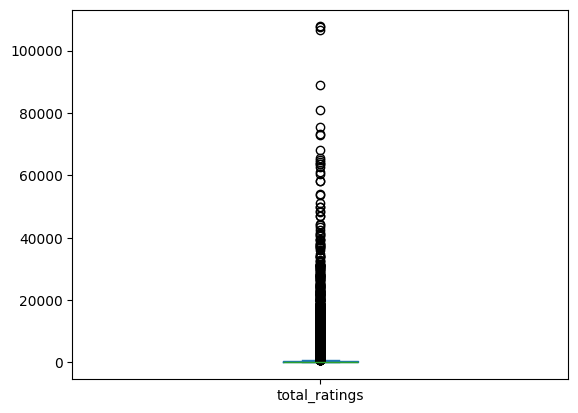

In [42]:
ratings['total_ratings'].plot(kind='box')

In [43]:
class_df_train

,BGGId,Name,YearPublished,MfgPlaytime,MinPlayers,MaxPlayers,MfgAgeRec,NumUserRatings
8120,32412,Palastgeflüster,2007,45,3,5,10,2268
10392,89222,Bloodsuckers,2011,120,2,4,13,129
8740,38826,San Juan Hill: The Santiago Campaign 1898,2009,60,2,2,12,40
21857,340790,1923 Cotton Club,2021,60,2,4,12,126
6568,19475,Spingo,1980,20,2,8,8,50
...,...,...,...,...,...,...,...,...
18997,255615,GoodCritters,2018,45,4,8,12,1028
16804,213871,Yippie Yippie Yeti,2016,45,2,4,6,31
9622,63710,Silk Road Maker,2009,10,1,4,7,37
21489,317432,Exit: The Game – The Cursed Labyrinth,2021,90,1,4,10,161


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
classificator = KNeighborsClassifier()
parameters={'n_neighbors':range(1,25)}
gridsearch=GridSearchCV(classificator, parameters, cv=10, verbose=1)
gridsearch.fit(class_df_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1),class_labels_train)
print("Best parametre: ", gridsearch.best_estimator_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Best parametre:  KNeighborsClassifier(n_neighbors=24)


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
classificator = KNeighborsClassifier()
parameters={'n_neighbors':range(25,50)}
gridsearch=GridSearchCV(classificator, parameters, cv=10, verbose=1)
gridsearch.fit(class_df_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1),class_labels_train)
print("Best parametre: ", gridsearch.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Best parametre:  KNeighborsClassifier(n_neighbors=49)


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
classificator = KNeighborsClassifier()
parameters={'n_neighbors':range(1,50)}
gridsearch=GridSearchCV(classificator, parameters, cv=10, verbose=1)
gridsearch.fit(scaler.fit_transform(class_df_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1)),class_labels_train)
print("Best parametre: ", gridsearch.best_estimator_)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Best parametre:  KNeighborsClassifier(n_neighbors=26)


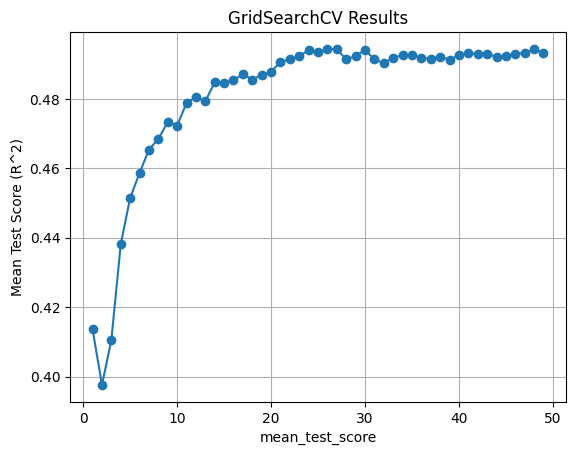

In [47]:
param_values=gridsearch.cv_results_['param_n_neighbors']
mean_test_scores=gridsearch.cv_results_['mean_test_score']

plt.plot(param_values, mean_test_scores, marker='o')
plt.xlabel('mean_test_score')
plt.ylabel('Mean Test Score (R^2)')
plt.title('GridSearchCV Results')
plt.grid(True)
plt.show()

In [48]:
knn=gridsearch.best_estimator_
X_train=scaler.fit_transform(class_df_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_train=class_labels_train
X_test=scaler.transform(class_df_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_test=class_labels_test
knn.fit(X_train, y_train)
print("Accuracy of KNN on training data:", round(knn.score(X_train, y_train), 5))
print("Accuracy of KNN on test data:", round(knn.score(X_test, y_test), 5))

Accuracy of KNN on training data: 0.53307
Accuracy of KNN on test data: 0.49282


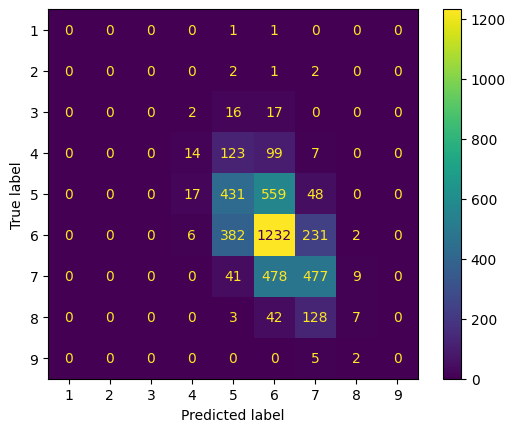

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, knn.predict(X_test), labels=knn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

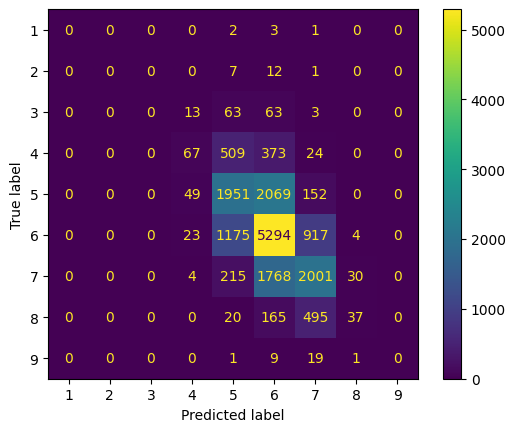

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_train, knn.predict(X_train), labels=knn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [51]:
from sklearn.svm import SVC
svc=SVC(random_state=0)
X_train=class_df_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1)
X_test=class_df_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1)
svc.fit(X_train,y_train)
print("Accuracy of SVC on train:", round(svc.score(X_train,y_train),5))
print("Accuracy of SVC on test:", round(svc.score(X_test, y_test),5))

Accuracy of SVC on train: 0.42868
Accuracy of SVC on test: 0.43124


In [52]:
X_train=scaler.fit_transform(class_df_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
X_test=scaler.transform(class_df_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1))

svc=SVC(random_state=0)
svc.fit(X_train,y_train)
print("Accuracy of SVC on train:", round(svc.score(X_train,y_train),5))
print("Accuracy of SVC on test:", round(svc.score(X_test, y_test),5))

Accuracy of SVC on train: 0.47212
Accuracy of SVC on test: 0.4634


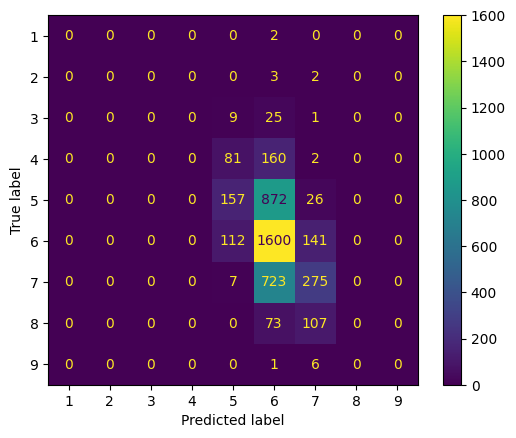

In [53]:
cm=confusion_matrix(y_test, svc.predict(X_test), labels=svc.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

In [54]:
svc=SVC(kernel="poly",random_state=0)
svc.fit(X_train,y_train)
print("Accuracy of SVC on train:", round(svc.score(X_train,y_train),5))
print("Accuracy of SVC on test:", round(svc.score(X_test, y_test),5))

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Accuracy of SVC on train: 0.44265
Accuracy of SVC on test: 0.43512


In [55]:

#import time
for c in [1, 10, 100]:
    start = time.time()
    model = SVC(C=c, kernel='linear')  # or 'rbf'
    model.fit(X_train, y_train)
    print(f"C={c} took {time.time() - start:.2f} sec")

    print("Accuracy of SVC on train:", round(model.score(X_train,y_train),5))
    print("Accuracy of SVC on test:", round(model.score(X_test, y_test),5))

NameError: name 'time' is not defined

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=5)

In [57]:
X_train=scaler.fit_transform(class_df_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_train=class_labels_train
X_test=scaler.transform(class_df_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_test=class_labels_test
forest.fit(X_train, y_train)
print("Accuracy of Random Forest on training data:", round(forest.score(X_train, y_train), 5))
print("Accuracy of Random Forest on test data:", round(forest.score(X_test, y_test), 5))

Accuracy of Random Forest on training data: 0.50792
Accuracy of Random Forest on test data: 0.50627


In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}


Replace to "best model" in final iteration, when compiling everything

In [ ]:
forest_best=RandomForestClassifier(class_weight=None, max_depth=10, 
                                   max_features="sqrt", min_samples_leaf=5, 
                                   min_samples_split=2, n_estimators=300)
forest_best.fit(X_train, y_train)
forest_save=forest_best
print("Accuracy of best Random Forest on training data:", round(forest_best.score(X_train, y_train), 5))
print("Accuracy of best Random Forest on test data:", round(forest_best.score(X_test, y_test), 5))

Accuracy of best Random Forest on training data: 0.56556
Accuracy of best Random Forest on test data: 0.52087


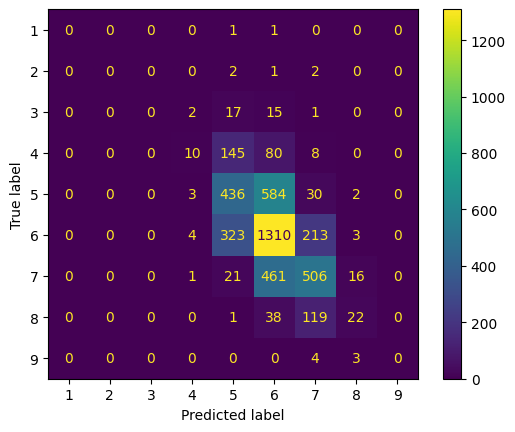

In [59]:
cm=confusion_matrix(y_test, forest_best.predict(X_test), labels=forest_best.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_best.classes_)
disp.plot()

In [60]:
datasets['subcategory'].head()

,BGGId,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic
0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0


In [61]:
X_train=pd.merge(
    class_df_train,
    datasets['subcategory'],
    on='BGGId',
    how='inner'
)
X_train=scaler.fit_transform(X_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_train=class_labels_train
X_test=pd.merge(
    class_df_test,
    datasets['subcategory'],
    on='BGGId',
    how='inner'
)
X_test=scaler.transform(X_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_test=class_labels_test

In [62]:
forest_best=RandomForestClassifier(class_weight=None, max_depth=20, 
                                   max_features="sqrt", min_samples_leaf=5, 
                                   min_samples_split=2, n_estimators=300)
forest_best.fit(X_train, y_train)
print("Accuracy of best Random Forest on training data:", round(forest_best.score(X_train, y_train), 5))
print("Accuracy of best Random Forest on test data:", round(forest_best.score(X_test, y_test), 5))

Accuracy of best Random Forest on training data: 0.58535
Accuracy of best Random Forest on test data: 0.51676


In [63]:
X_train=class_df_train
X_test=class_df_test
for data_name in datasets.keys():
    X_train=pd.merge(
    X_train,
    datasets[data_name],
    on='BGGId',
    how='inner'
    )

    X_test=pd.merge(
    X_test,
    datasets[data_name],
    on='BGGId',
    how='inner'
    )

feat_names = X_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1).columns

X_train=scaler.fit_transform(X_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_train=class_labels_train
X_test=scaler.transform(X_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_test=class_labels_test

In [64]:
forest_best=RandomForestClassifier(class_weight=None, max_depth=20, 
                                   max_features="sqrt", min_samples_leaf=5, 
                                   min_samples_split=2, n_estimators=300)
forest_best.fit(X_train, y_train)
print("Accuracy of best Random Forest on training data:", round(forest_best.score(X_train, y_train), 5))
print("Accuracy of best Random Forest on test data:", round(forest_best.score(X_test, y_test), 5))

Accuracy of best Random Forest on training data: 0.49339
Accuracy of best Random Forest on test data: 0.48597


In [65]:
X_test.size/y_test.size

5527.0

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [67]:
base_tree = DecisionTreeClassifier(max_depth=3)



ada = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train, y_train)

base_tree = DecisionTreeClassifier(max_depth=3)
base_tree.fit(X_train, y_train)
print("DecisionTree train accuracy:", base_tree.score(X_train, y_train))
print("DecisionTree test accuracy:", base_tree.score(X_test, y_test))

print("AdaBoost train accuracy:", ada.score(X_train, y_train))
print("AdaBoost test accuracy:", ada.score(X_test, y_test))

DecisionTree train accuracy: 0.4771949828962372
DecisionTree test accuracy: 0.47229190421892814
AdaBoost train accuracy: 0.47702394526795894
AdaBoost test accuracy: 0.47069555302166477


In [68]:
base_tree = DecisionTreeClassifier(max_depth=3)



grad = GradientBoostingClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.1,       # shrinkage factor
    max_depth=5,             # depth of each tree
    min_samples_split=2,     # minimum samples to split node
    min_samples_leaf=5,      # regularization
    subsample=0.8,           # stochastic gradient boosting
    max_features='sqrt',     # feature subsampling
    random_state=42

)

grad.fit(X_train, y_train)

base_tree = DecisionTreeClassifier(max_depth=3)
base_tree.fit(X_train, y_train)
print("DecisionTree train accuracy:", base_tree.score(X_train, y_train))
print("DecisionTree test accuracy:", base_tree.score(X_test, y_test))

print("GradBoost train accuracy:", grad.score(X_train, y_train))
print("GradBoost test accuracy:", grad.score(X_test, y_test))

DecisionTree train accuracy: 0.4771949828962372
DecisionTree test accuracy: 0.47229190421892814
GradBoost train accuracy: 0.2441847206385405
GradBoost test accuracy: 0.23990877993158494


In [69]:
y_train_xg=y_train-1
y_test_xg=y_test-1

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',      # for multiclass
    random_state=42
)

xgb.fit(X_train, y_train_xg)

print("XGBoost train accuracy:", xgb.score(X_train, y_train_xg))
print("XGBoost test accuracy:", xgb.score(X_test, y_test_xg))

C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:41:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost train accuracy: 0.7151083238312429
XGBoost test accuracy: 0.5808437856328392


In [70]:
from sklearn.metrics import classification_report

y_pred = xgb.predict(X_test)
print(classification_report(y_test_xg, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        35
           3       0.49      0.16      0.24       243
           4       0.53      0.49      0.51      1055
           5       0.58      0.74      0.65      1853
           6       0.64      0.57      0.60      1005
           7       0.60      0.32      0.42       180
           8       0.00      0.00      0.00         7

    accuracy                           0.58      4385
   macro avg       0.32      0.25      0.27      4385
weighted avg       0.57      0.58      0.57      4385



C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [71]:

def xgb_boost_features(features):
    X_train=class_df_train
    X_test=class_df_test

    for data_name in features:
        X_train=pd.merge(
        X_train,
        datasets[data_name],
        on='BGGId',
        how='inner'
        )

        X_test=pd.merge(
        X_test,
        datasets[data_name],
        on='BGGId',
        how='inner'
        )

    feat_names = X_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1).columns

    X_train=scaler.fit_transform(X_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
    y_train=class_labels_train
    X_test=scaler.transform(X_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
    y_test=class_labels_test

    y_train_xg=y_train-1
    y_test_xg=y_test-1

    xgb = XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',      # for multiclass
        random_state=42
    )

    xgb.fit(X_train, y_train_xg)

    print (features)
    print("XGBoost train accuracy:", xgb.score(X_train, y_train_xg))
    print("XGBoost test accuracy:", xgb.score(X_test, y_test_xg))
    print('\n')
    return xgb

In [72]:
import itertools
array=['mechanic','subcategory','themes', 'publisher']
for L in range(len(array) + 1):
    for subset in itertools.combinations(array, L):
        xgb_boost_features(subset)

C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:23:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


()
XGBoost train accuracy: 0.5529076396807298
XGBoost test accuracy: 0.5167616875712657




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:23:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic',)
XGBoost train accuracy: 0.5866020524515393
XGBoost test accuracy: 0.5438996579247435




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:23:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('subcategory',)
XGBoost train accuracy: 0.5618015963511973
XGBoost test accuracy: 0.5217787913340936




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:23:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('themes',)
XGBoost train accuracy: 0.572405929304447
XGBoost test accuracy: 0.5229190421892816




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('publisher',)
XGBoost train accuracy: 0.5960091220068415
XGBoost test accuracy: 0.5486887115165336




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:24:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic', 'subcategory')
XGBoost train accuracy: 0.5945838084378563
XGBoost test accuracy: 0.5395667046750285




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:24:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic', 'themes')
XGBoost train accuracy: 0.5957240592930445
XGBoost test accuracy: 0.5409350057012543




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:25:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic', 'publisher')
XGBoost train accuracy: 0.6130558722919042
XGBoost test accuracy: 0.560091220068415




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:25:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('subcategory', 'themes')
XGBoost train accuracy: 0.5794754846066135
XGBoost test accuracy: 0.5233751425313569




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:26:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('subcategory', 'publisher')
XGBoost train accuracy: 0.5986887115165337
XGBoost test accuracy: 0.5498289623717217




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:26:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('themes', 'publisher')
XGBoost train accuracy: 0.6047890535917902
XGBoost test accuracy: 0.5537058152793615




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:27:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic', 'subcategory', 'themes')
XGBoost train accuracy: 0.6012542759407069
XGBoost test accuracy: 0.544127708095781




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:28:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic', 'subcategory', 'publisher')
XGBoost train accuracy: 0.6149372862029646
XGBoost test accuracy: 0.5614595210946408




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:29:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic', 'themes', 'publisher')
XGBoost train accuracy: 0.617502850627138
XGBoost test accuracy: 0.5582668187001141




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:30:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('subcategory', 'themes', 'publisher')
XGBoost train accuracy: 0.608266818700114
XGBoost test accuracy: 0.552109464082098




C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:31:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


('mechanic', 'subcategory', 'themes', 'publisher')
XGBoost train accuracy: 0.623945267958951
XGBoost test accuracy: 0.5635119726339795




Теми гри (про що гра розповідає) не покращили оцінку рейтингу взагалі. Найкращими показниками якості були видавець (бренд) та механіка (які дії виконувати).

In [73]:
X_train=class_df_train
X_test=class_df_test
features=['mechanic', 'subcategory', 'themes', 'publisher']
for data_name in features:
        X_train=pd.merge(
        X_train,
        datasets[data_name],
        on='BGGId',
        how='inner'
        )

        X_test=pd.merge(
        X_test,
        datasets[data_name],
        on='BGGId',
        how='inner'
        )




X_test=scaler.transform(X_test.drop(["BGGId", "Name", "NumUserRatings"],axis=1))
y_test=class_labels_test
y_train_xg=y_train-1
y_test_xg=y_test-1
xgb=xgb_boost_features(features)
y_pred = xgb.predict(X_test)

print(classification_report(y_test_xg, y_pred))

C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:32:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['mechanic', 'subcategory', 'themes', 'publisher']
XGBoost train accuracy: 0.623945267958951
XGBoost test accuracy: 0.5635119726339795


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        35
           3       0.51      0.09      0.16       243
           4       0.51      0.45      0.48      1055
           5       0.56      0.75      0.64      1853
           6       0.61      0.55      0.58      1005
           7       0.64      0.23      0.34       180
           8       0.00      0.00      0.00         7

    accuracy                           0.56      4385
   macro avg       0.32      0.23      0.24      4385
weighted avg       0.56      0.56      0.54      4385



C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\op101\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [77]:
importances = xgb.feature_importances_
feat_names = X_train.drop(["BGGId", "Name", "NumUserRatings"],axis=1).columns


importance_df = pd.DataFrame({
    'feature': feat_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(20))

                    feature  importance
36     Roll / Spin and Move    0.006791
1891             Ogry Games    0.006191
789       uplay.it edizioni    0.005719
1371           Ghenos Games    0.005685
469      Filosofia Éditions    0.005495
0             YearPublished    0.005016
163              Miniatures    0.004795
389           Hans im Glück    0.004470
92    Solo / Solitaire Game    0.004425
50               Simulation    0.004406
2249            Funko Games    0.004377
967       Victory Games (I)    0.004332
1026         Asterion Press    0.004236
1               MfgPlaytime    0.004175
133    Communication Limits    0.004081
401       Descartes Editeur    0.003990
1426           Banana Games    0.003870
1167      Kadon Enterprises    0.003784
2035             Palm Court    0.003670
781             nestorgames    0.003658


In [ ]:
importances = forest_best.feature_importances_
feat_names=forest_best.feature_names_in_

importance_df = pd.DataFrame({
    'feature': feat_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(20))

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

In [ ]:
artists_numbered=datasets['designer'].drop("BGGId",axis=1).sum(axis=0).sort_values(ascending=False)
artists_numbered[artists_numbered>0]

Low-Exp Designer     8355
(Uncredited)         1452
Reiner Knizia         338
Joseph Miranda        141
Wolfgang Kramer       136
                     ... 
Łukasz Wrona            4
Tim Uren                4
Scott Kimball           4
Michael Stackpole       4
Max Wikström            4
Length: 1593, dtype: int64

In [ ]:
artists_numbered=datasets['artist'].drop("BGGId",axis=1).sum(axis=0).sort_values(ascending=False)
artists_numbered

Low-Exp Artist             6989
Rodger B. MacGowan          379
(Uncredited)                363
Franz Vohwinkel             318
Redmond A. Simonsen         254
                           ... 
Michael Hays                  4
Chris Drew                    4
Christopher Peacey            4
Jonathan La Trobe-Lewis       4
Johannes Vermeer              4
Length: 1680, dtype: int64

In [ ]:
artists_numbered[artists_numbered>100].size

16

In [ ]:
artists_numbered=datasets['publisher'].drop("BGGId",axis=1).sum(axis=0).sort_values(ascending=False)
artists_numbered[artists_numbered>0]

Low-Exp Publisher               4764
Hasbro                           594
(Self-Published)                 592
Asmodee                          575
Ravensburger                     523
                                ... 
Past Times                         4
2D6.EE (Side Quest Games)          4
Dice Realm                         4
The Games Team Ltd.                4
Games and Puzzles (magazine)       4
Length: 1865, dtype: int64

In [ ]:
artists_numbered=datasets['mechanic']
artists_numbered.head()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
artists_numbered=datasets['mechanic'].drop("BGGId",axis=1).sum(axis=0).sort_values(ascending=False)
artists_numbered[artists_numbered>0]

Dice Rolling               6486
Hand Management            4496
Set Collection             2959
Variable Player Powers     2736
Hexagon Grid               2438
                           ... 
Induction                    10
Pattern Movement             10
Different Dice Movement      10
Order Counters                9
Passed Action Token           5
Length: 157, dtype: int64

In [ ]:
artists_numbered=datasets['themes'].drop("BGGId",axis=1).sum(axis=0).sort_values(ascending=False)
artists_numbered[artists_numbered<2].

Fantasy                                 2702
Science Fiction                         1675
Fighting                                1668
Economic                                1519
Animals                                 1367
                                        ... 
Theme_Fashion                              2
Theme_Spanish Political Games              2
Theme_Latin American Political Games       2
Theme_Camping                              2
Theme_Flags identification                 2
Length: 217, dtype: int64

In [ ]:
artists_numbered=datasets['subcategory'].drop("BGGId",axis=1).sum(axis=0).sort_values(ascending=False)
artists_numbered[artists_numbered>0]

Card Game                 6480
Miniatures                1089
Exploration                897
Puzzle                     676
Print & Play               604
Territory Building         514
Educational                502
Word Game                  484
Collectible Components     359
Electronic                 205
dtype: int64

In [ ]:
artists_numbered.value_counts().sort_index(ascending=True)

0       5997
1      10599
2       3250
3       1192
4        433
5        196
6         84
7         43
8         32
9         27
10        11
11         6
12         7
13         4
14         6
15         4
16         4
17         3
18         1
19         2
20         2
21         2
22         2
23         2
24         2
25         2
26         1
28         3
29         1
32         2
36         1
45         1
54         1
77         1
165        1
Name: count, dtype: int64

Порівняння методів

In [ ]:
print("Accuracy on training data for ")
print("KNN classifier ", int(knn.score(X_test, y_test)*100), '%', '\tSVC ', int(svc.score(X_test,y_test)), '%', '\tRandom forest :', int(forest_save.score(X_test,y_test)*100), '%', '\tAdaBoost :', int(ada.score(X_test,y_test)*100), '%', '\tXGBoost :', int(), '%')

In [ ]:
games[games['MfgPlaytime']>480]['MfgPlaytime'].size

251

In [ ]:
gridsearch.cv_results_['mean_test_score']

NameError: name 'gridsearch' is not defined

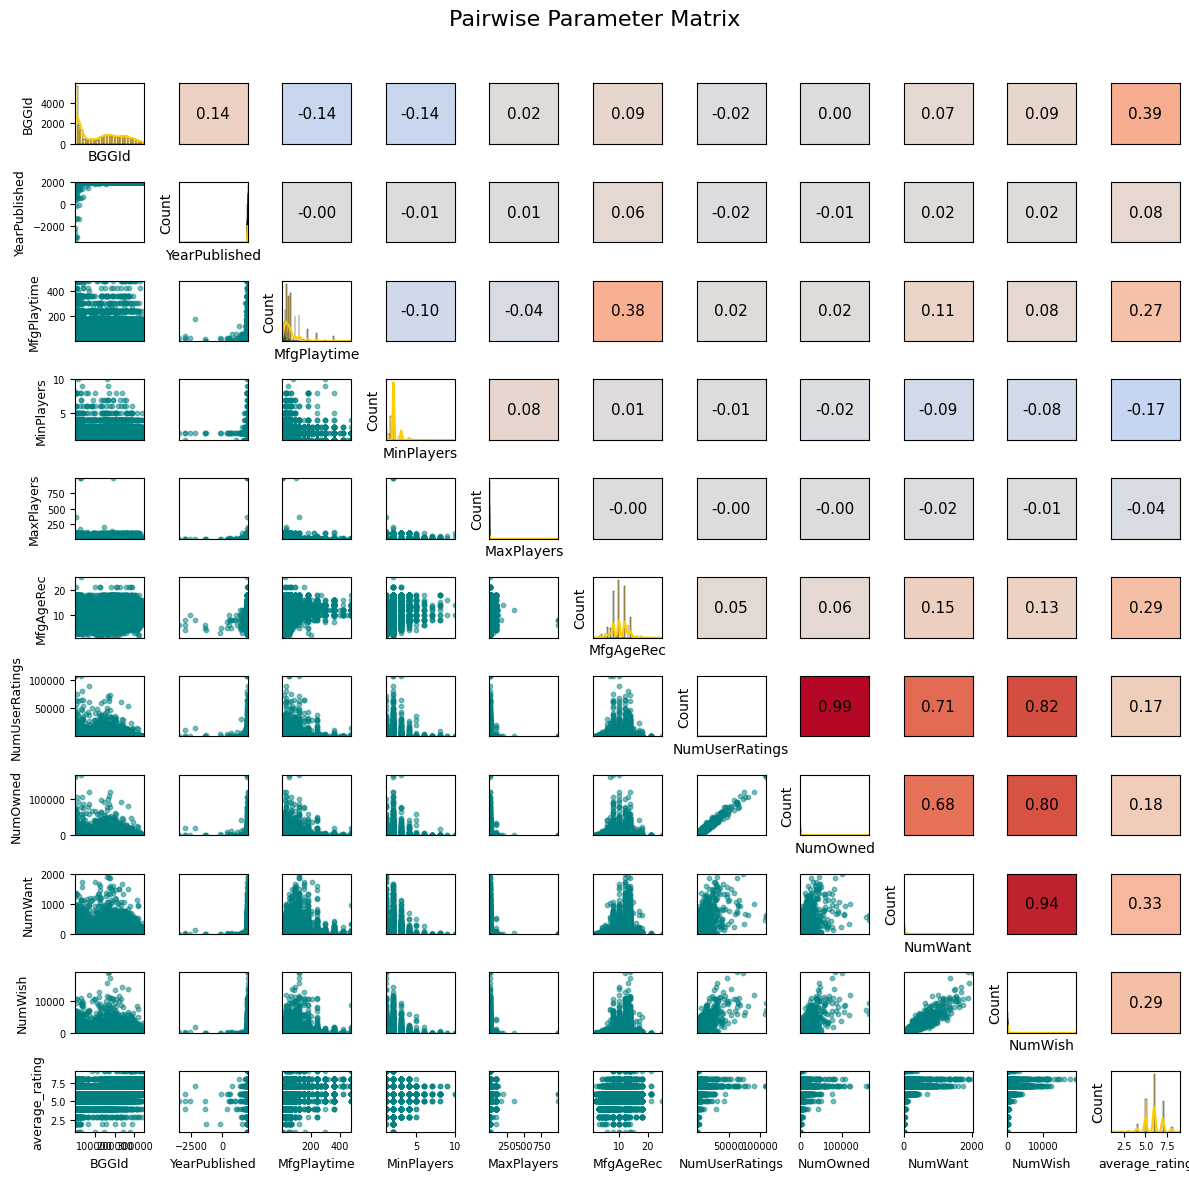

In [82]:
subplot_matrix(games_classification[games_classification['MfgPlaytime']<=480])

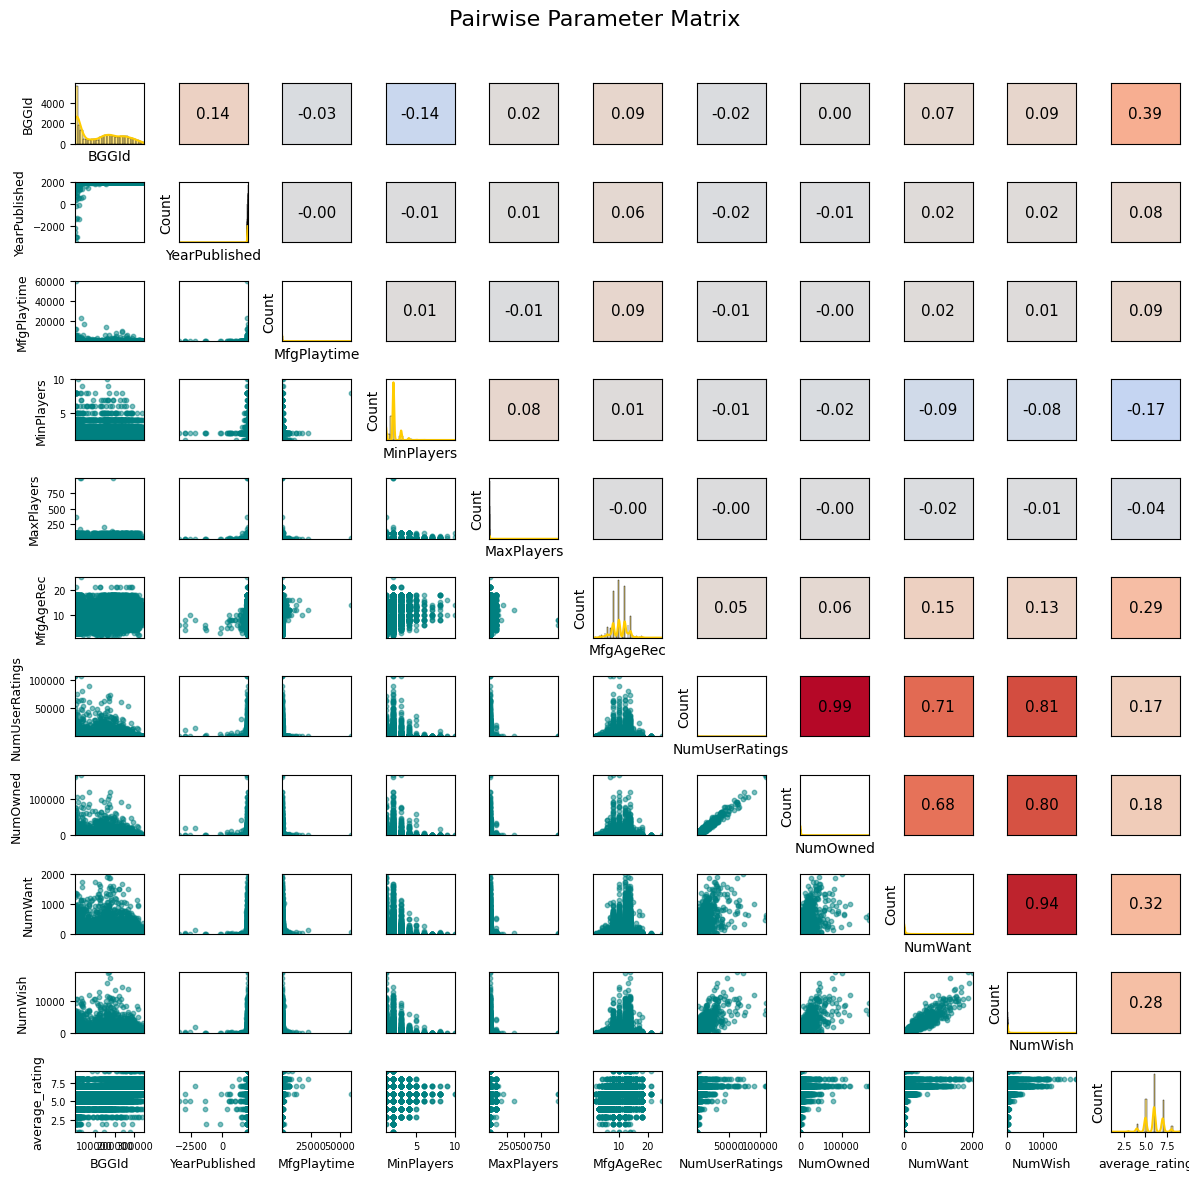

In [83]:
subplot_matrix(games_classification)

Регресія

In [84]:
#random sampling error
from sklearn.metrics import root_mean_squared_error, r2_score

y_random = np.random.choice(y_train, size=len(y_test), replace=True)

r2_random=r2_score(y_test,y_random)
print("R2 of random sampling baseline:", round(r2_random, 4))

rmse_random = root_mean_squared_error(y_test, y_random)
print("RMSE of random sampling baseline:", round(rmse_random, 4))

R2 of random sampling baseline: -0.9494
RMSE of random sampling baseline: 1.3731


In [86]:
X_train=reg_df_train.drop(['BGGId','NumUserRatings','Name'],axis=1)
X_test=reg_df_test.drop(['BGGId','NumUserRatings','Name'],axis=1)
y_train=reg_labels_train
y_test=reg_labels_test

In [109]:
def base_regression(regressor, name):
    regressor.fit(X_train, y_train)

    y_reg_predict=regressor.predict(X_train)


    print(f"{name} Regression R² train:", r2_score(y_train, y_reg_predict))
    print(f"{name} Regression RMSE train:", root_mean_squared_error(y_train, y_reg_predict))

    y_reg_predict = regressor.predict(X_test)

    print(f"{name} Regression R² test:", r2_score(y_test, y_reg_predict))
    print(f"{name} Regression RMSE test:", root_mean_squared_error(y_test, y_reg_predict))

In [110]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
base_regression(linreg, "Linear")

Linear Regression R² train: 0.14055147198749418
Linear Regression RMSE train: 0.864419700550915
Linear Regression R² test: 0.05897818616178285
Linear Regression RMSE test: 0.9369772828944758


In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

base_regression(poly_model, "Polynomial(2)")

Polynomial(2) Regression R² train: 0.20255821276695007
Polynomial(2) Regression RMSE train: 0.8326533139650326
Polynomial(2) Regression R² test: -0.37554943588620415
Polynomial(2) Regression RMSE test: 1.132836719256947


In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
base_regression(poly_model, "Polynomial(2)")

Polynomial(2) Regression R² train: 0.24850764350465515
Polynomial(2) Regression RMSE train: 0.8083082359604098
Polynomial(2) Regression R² test: -27.06100558744434
Polynomial(2) Regression RMSE test: 5.116592514851034


In [113]:
#describbe in detail
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R²:", lasso.score(X_test, y_test))

Ridge R²: 0.05897397991466535
Lasso R²: -0.006289727711001447


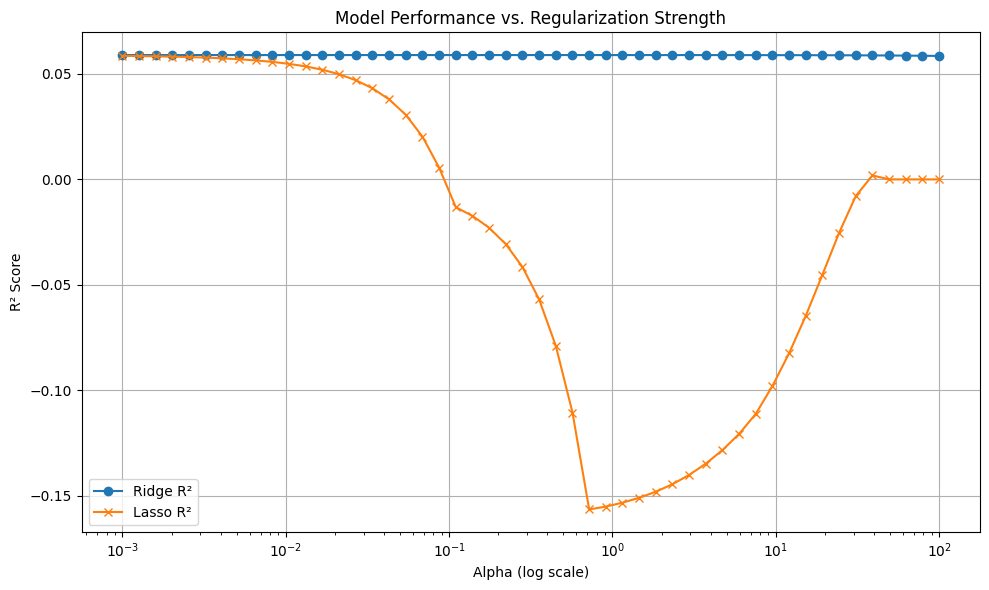

In [114]:
# Range of alpha values to test (log-spaced for better coverage)
alphas = np.logspace(-3, 2, 50)

ridge_scores = []
lasso_scores = []

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_scores.append(ridge.score(X_test, y_test))
    
    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_scores.append(lasso.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, label='Ridge R²', marker='o')
plt.plot(alphas, lasso_scores, label='Lasso R²', marker='x')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('Model Performance vs. Regularization Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Спробуємо ансамблевий метод для передбачення

In [115]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)

base_regression(forest, "Forest")

Forest Regression R² train: 0.7455233013768753
Forest Regression RMSE train: 0.4703690427865899
Forest Regression R² test: 0.32387536983660015
Forest Regression RMSE test: 0.7942232464972363


In [118]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

base_regression(forest, "Forest")

Forest Regression R² train: 0.5008905109471664
Forest Regression RMSE train: 0.658737873386394
Forest Regression R² test: 0.3957403393694945
Forest Regression RMSE test: 0.7508289633587827


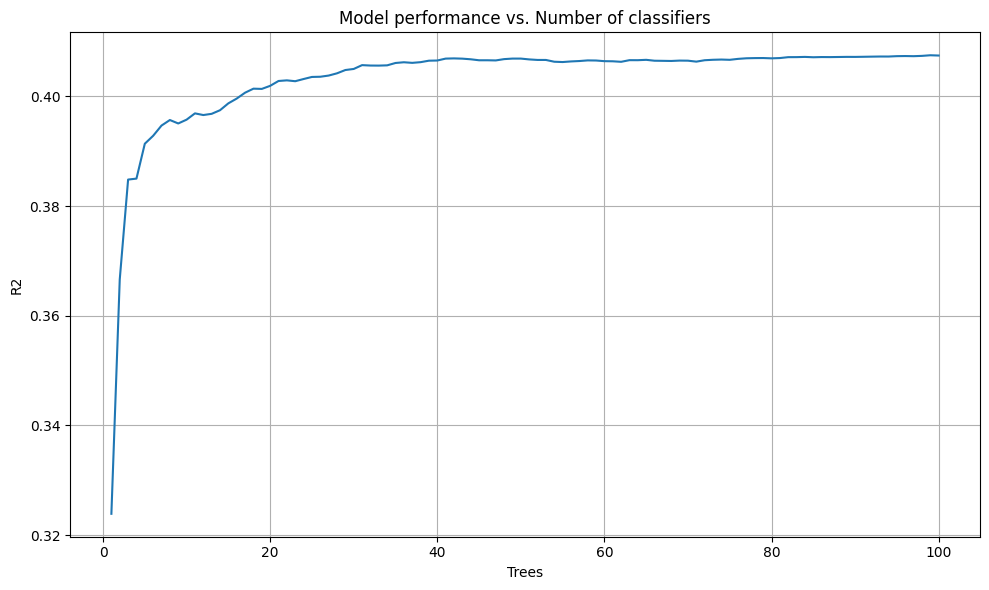

In [120]:
num_trees=np.linspace(1,100,100)
scores=[]
for trees in num_trees:
    forest=RandomForestRegressor(n_estimators=np.int_(trees), max_depth=10, random_state=42)
    forest.fit(X_train,y_train)
    y_pred=forest.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

plt.figure(figsize=(10, 6))
plt.plot(num_trees,scores)
plt.xlabel("Trees")
plt.ylabel("R2")
plt.title("Model performance vs. Number of classifiers")
plt.grid()
plt.tight_layout()
plt.show()

In [124]:
param_grid = {
    'n_estimators': np.int_(np.linspace(10,100,10)),
    'max_depth': [None, 10, 20, 30],
}

reg = RandomForestRegressor(random_state=42)
grid = GridSearchCV(reg, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'max_depth': 10, 'n_estimators': 80}


In [125]:
base_regression(grid.best_estimator_,"Best forest")

Best forest Regression R² train: 0.5122017115374431
Best forest Regression RMSE train: 0.6512306857288342
Best forest Regression R² test: 0.40691724205209456
Best forest Regression RMSE test: 0.7438525655982077
